In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
maindir = "../vehicle detection/data"
os.listdir(maindir)

['.ipynb_checkpoints', 'new', 'non-vehicles', 'vehicles']

In [3]:
vehicle = os.listdir(maindir+"/vehicles")
non_vehicle = os.listdir(maindir+"/non-vehicles")
vehicle

['1.png',
 '10.png',
 '1000.png',
 '1001.png',
 '1002.png',
 '1003.png',
 '1004.png',
 '1005.png',
 '1006.png',
 '1007.png',
 '1008.png',
 '1009.png',
 '101.png',
 '1010.png',
 '1011.png',
 '1012.png',
 '1013.png',
 '1014.png',
 '1015.png',
 '1016.png',
 '1017.png',
 '1018.png',
 '1019.png',
 '102.png',
 '1020.png',
 '1021.png',
 '1022.png',
 '1023.png',
 '1024.png',
 '1025.png',
 '1026.png',
 '1027.png',
 '1028.png',
 '1029.png',
 '103.png',
 '1030.png',
 '1031.png',
 '1032.png',
 '1033.png',
 '1034.png',
 '1035.png',
 '1036.png',
 '1037.png',
 '1038.png',
 '1039.png',
 '104.png',
 '1040.png',
 '1041.png',
 '1042.png',
 '1043.png',
 '1044.png',
 '1045.png',
 '1046.png',
 '1047.png',
 '1048.png',
 '1049.png',
 '105.png',
 '1050.png',
 '1051.png',
 '1052.png',
 '1053.png',
 '1054.png',
 '1055.png',
 '1056.png',
 '1057.png',
 '1058.png',
 '1059.png',
 '106.png',
 '1060.png',
 '1061.png',
 '1062.png',
 '1063.png',
 '1064.png',
 '1065.png',
 '1066.png',
 '1067.png',
 '1068.png',
 '1069.png

In [4]:
vehicle_dir=maindir+"/vehicles"
nonvehicle_dir=maindir+"/non-vehicles"

In [5]:
print(f"Number of Vehicle Images: {len(vehicle)}")
print(f"Number of Non Vehicle Images: {len(non_vehicle)}")

Number of Vehicle Images: 8792
Number of Non Vehicle Images: 8968


# Sample of train images

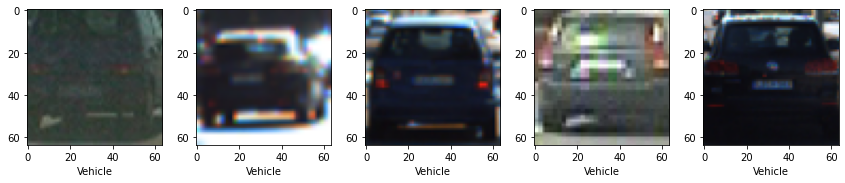

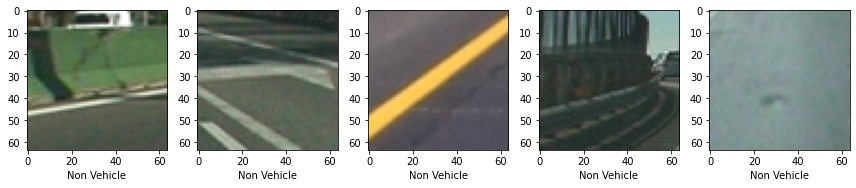

In [6]:
plt.figure(figsize=(12,9))
import cv2
vehicle_img = np.random.choice(vehicle,5)
nonvehicle_img = np.random.choice(non_vehicle,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(vehicle_dir+'/'+vehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Vehicle")
    #plt.axis("off")
    plt.tight_layout()
    plt.imshow(img)
plt.show()
plt.figure(figsize=(12,9)) 
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(nonvehicle_dir+'/'+nonvehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Non Vehicle")
    #plt.axis("off")
    plt.imshow(img)
plt.tight_layout()
plt.show()

# Convert image to array

In [7]:
train = []
label = []
import tqdm#for creating progress bars
from tensorflow.keras.preprocessing import image

for i in tqdm.tqdm(vehicle):
    img = cv2.imread(vehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    label.append("Vehicle")
    
for i in tqdm.tqdm(non_vehicle):
    img = cv2.imread(nonvehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    label.append("Non Vehicle")

100%|████████████████████████████████████████████████████████████████████████████| 8968/8968 [00:07<00:00, 1261.07it/s]


In [8]:
train = np.array(train)
label = np.array(label)
train.shape,label.shape

((17760, 150, 150, 3), (17760,))

Also,We see above that our data set is balanced. That's good for building a classification model.

In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
le = LabelEncoder()
label= le.fit_transform(label)
label[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [10]:
label = to_categorical(label)
print(label,label.shape)
train,label = shuffle(train, label)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]] (17760, 2)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,label,test_size=0.2,random_state = 42)

In [26]:
x_train

array([[[[122, 127, 104],
         [122, 127, 105],
         [123, 128, 107],
         ...,
         [ 48,  62,  35],
         [ 48,  62,  36],
         [ 48,  62,  36]],

        [[121, 126, 103],
         [122, 127, 104],
         [123, 128, 106],
         ...,
         [ 48,  62,  35],
         [ 48,  62,  35],
         [ 48,  62,  35]],

        [[120, 125, 102],
         [120, 126, 102],
         [122, 127, 105],
         ...,
         [ 48,  63,  33],
         [ 48,  62,  34],
         [ 48,  62,  34]],

        ...,

        [[133, 126, 104],
         [132, 126, 104],
         [132, 126, 103],
         ...,
         [120, 120,  98],
         [120, 121,  98],
         [120, 121,  98]],

        [[133, 127, 105],
         [133, 126, 105],
         [132, 126, 104],
         ...,
         [119, 119,  97],
         [118, 119,  96],
         [118, 119,  96]],

        [[133, 127, 105],
         [133, 127, 105],
         [132, 126, 104],
         ...,
         [118, 119,  96],
        

Import the effnet model

In [12]:
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = "imagenet",include_top = False,input_shape=(150,150,3))

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(2,activation='softmax')(model)

model = Model(inputs = effnet.input, outputs = model)

In [14]:
model.compile(optimizer ="adam", loss = "categorical_crossentropy",metrics = ['accuracy'])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("vehicle.h5",monitor = "val_accuracy",save_best_only = True, 
                             mode='auto',verbose=1)
earlystop = EarlyStopping(monitor = "val_accuracy", patience = 5,mode='auto',verbose=1)
reducelr = ReduceLROnPlateau(monitor = "val_accuracy",factor = 0.3, patience = 3,
                            min_delta = 0.001,mode = 'auto',verbose=1)

In [16]:
history  = model.fit(x_train,y_train, epochs = 1,batch_size=32, validation_data = (x_test,y_test),
                    verbose = 1, callbacks = [checkpoint, earlystop,reducelr])

444/444 [==============================] - 1543s 3s/step - loss: 0.0285 - accuracy: 0.9892 - val_loss: 0.0135 - val_accuracy: 0.9966

Epoch 00001: val_accuracy improved from -inf to 0.99662, saving model to vehicle.h5


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [17]:
model.evaluate(x_test,y_test)

111/111 [==============================] - 88s 794ms/step - loss: 0.0135 - accuracy: 0.9966


[0.013475973159074783, 0.9966216087341309]

In [18]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [19]:
y_test = np.argmax(y_test,axis=1)
y_test[:15]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1811,   10],
       [   2, 1729]], dtype=int64)

# Testing on new images

In [28]:
new_dir=maindir+"/new"
print(f"Number of Images: {len(new_dir)}")
test = os.listdir(maindir+"/new")
new_feature = []
import tqdm#for creating progress bars
from tensorflow.keras.preprocessing import image

for i in tqdm.tqdm(test):
    img = cv2.imread(new_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    new_feature.append(img)
new_feature=np.array(new_feature)
#print(new_feature)
y_pred = model.predict(new_feature)
y_pred = np.argmax(y_pred,axis=1)
y_pred[y_p]
y_pred

Number of Images: 29


100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2459.28it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'replace'